In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [8]:
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [9]:
data.shape

(103, 7)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


# Data Cleaning

In [11]:
data['Production (Tons)'] = data['Production (Tons)'].str.replace('.','')

In [12]:
data['Production per Person (Kg)'] = data['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
data['Acreage (Hectare)'] = data['Acreage (Hectare)'].str.replace('.','')
data['Yield (Kg / Hectare)'] = data['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [13]:
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [14]:
data.rename(columns={'Production (Tons)':'Production(Tons)', 'Production per Person (Kg)':'Production_per_Person(Kg)',
                     'Acreage (Hectare)':'Acreage(Hectare)', 'Yield (Kg / Hectare)':'Yield(Kg/Hectare)'}, inplace = True)
                    

In [15]:
data.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [16]:
data.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [17]:
data.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [18]:
data[data['Acreage(Hectare)'].isna()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


Since, there is only one row with NaN value, and also with quiet less production of sugar, removing it will have negligible effect on the analysis of data. 

In [19]:
data = data.dropna().reset_index(drop = True)

In [20]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [21]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [22]:
data.duplicated().sum() #No duplicates

0

In [23]:
data.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [24]:
data['Production(Tons)'] = data['Production(Tons)'].astype(float)
data['Production_per_Person(Kg)'] = data['Production_per_Person(Kg)'].astype(float)
data['Acreage(Hectare)'] = data['Acreage(Hectare)'].astype(float)
data['Yield(Kg/Hectare)'] = data['Yield(Kg/Hectare)'].astype(float)

In [25]:
data.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [26]:
data.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

# Univariate Analysis

In [27]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## How many countries produce sugarcane from each continent?

In [28]:
data['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

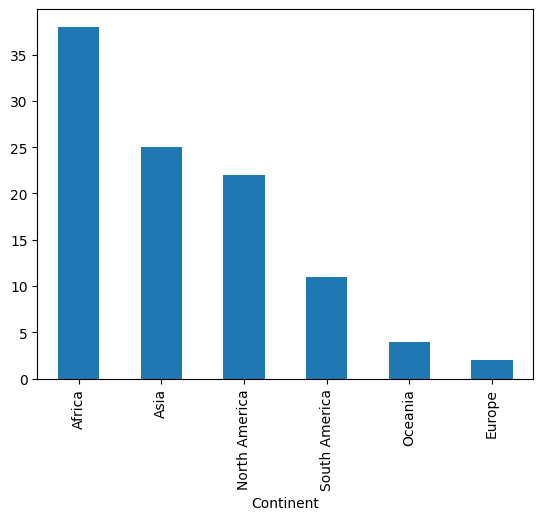

In [29]:
data['Continent'].value_counts().plot(kind='bar')
plt.show()

Conclusion: Africa has the maximum number of countries which produce sugarcane

## Distribution of the columns

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9644\1890060568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Production(Tons)'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9644\1890060568.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Production_per_Person(Kg)'])
C:\Users\ASUS

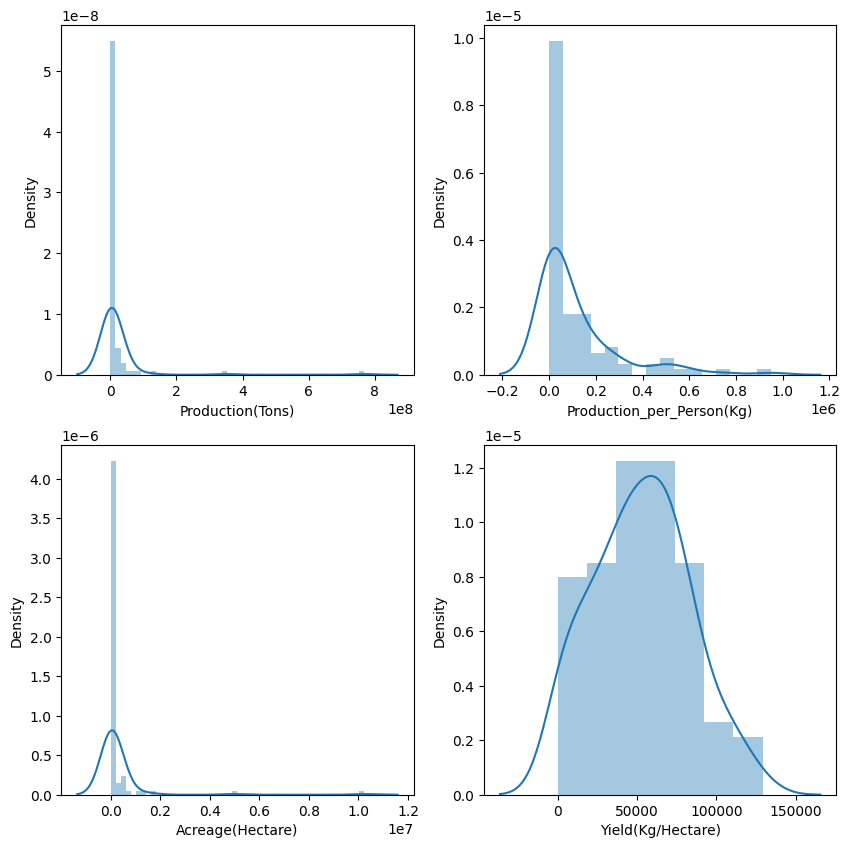

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(data['Production(Tons)'])

plt.subplot(2,2,2)
sns.distplot(data['Production_per_Person(Kg)'])

plt.subplot(2,2,3)
sns.distplot(data['Acreage(Hectare)'])

plt.subplot(2,2,4)
sns.distplot(data['Yield(Kg/Hectare)'])
plt.show()

Production(Tons), Production_per_Person(Kg), Acreage(Hectare),  Yield(Kg/Hectare) are right skewed distributions, hence ouliers will be found on right direction. 

In [31]:
data.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Checking Outliers

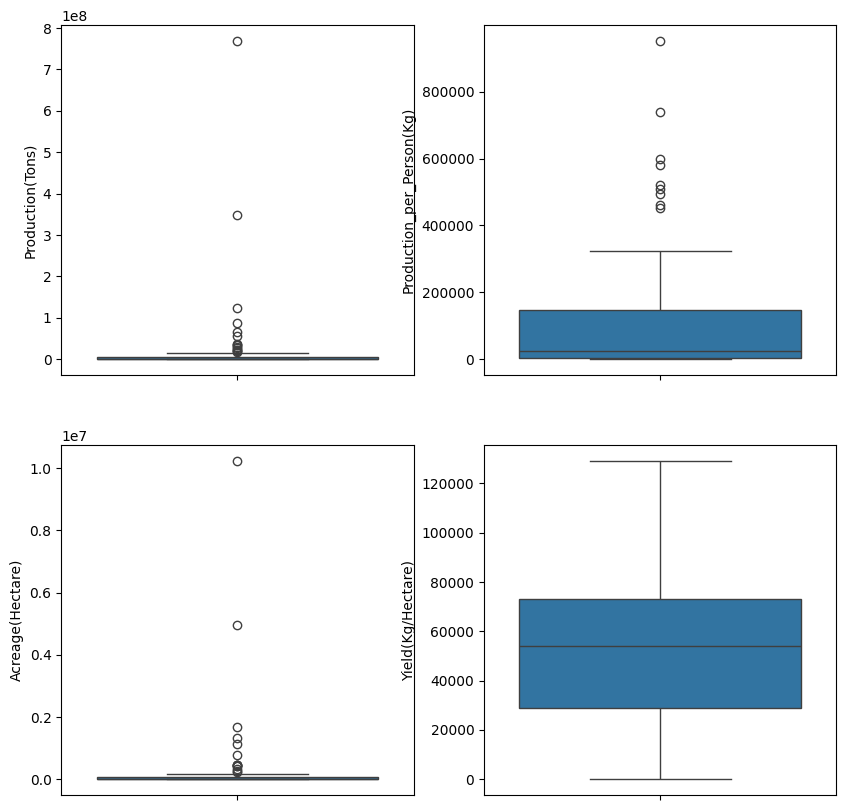

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data['Production(Tons)'])

plt.subplot(2,2,2)
sns.boxplot(data['Production_per_Person(Kg)'])

plt.subplot(2,2,3)
sns.boxplot(data['Acreage(Hectare)'])

plt.subplot(2,2,4)
sns.boxplot(data['Yield(Kg/Hectare)'])
plt.show()

Production(Tons), Production_per_Person(Kg), Acreage(Hectare), Yield(Kg/Hectare) have outliers, but Yield(Kg/Hectare) does not have outliers.

Will not remove any outliers as they will be required for the analysis of the given data.

# Bivariate Analysis

In [33]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Which country produces maximum sugarcane?

In [34]:
data_new = data[['Country', 'Production(Tons)']].set_index('Country')

In [35]:
data_new['Production(Tons)_percent']=data_new['Production(Tons)']*100/data_new['Production(Tons)'].sum()
data_new = data_new.sort_values(by='Production(Tons)_percent',ascending = False)
data_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06
Samoa,12.0,6.358022e-07


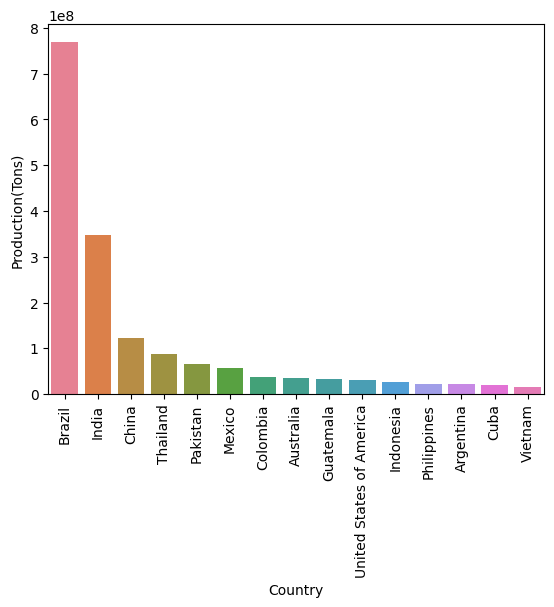

In [36]:
sns.barplot(data = data_new.head(15), x = data_new.index[:15], y = 'Production(Tons)', hue = data_new.index[:15])
plt.xticks(rotation=90)  
plt.show()

Conclusion: The country "Brazil" produces maximum sugarcane out of all countries

## Which country has the largest land for sugarcane planting?

In [37]:
data[['Country','Acreage(Hectare)']].set_index('Country').sort_values(by='Acreage(Hectare)',ascending=False)

,Acreage(Hectare)
Country,
Brazil,10226205.0
India,4950000.0
China,1675215.0
Thailand,1336575.0
Pakistan,1130820.0
...,...
Spain,9.0
Lebanon,3.0
Singapore,2.0


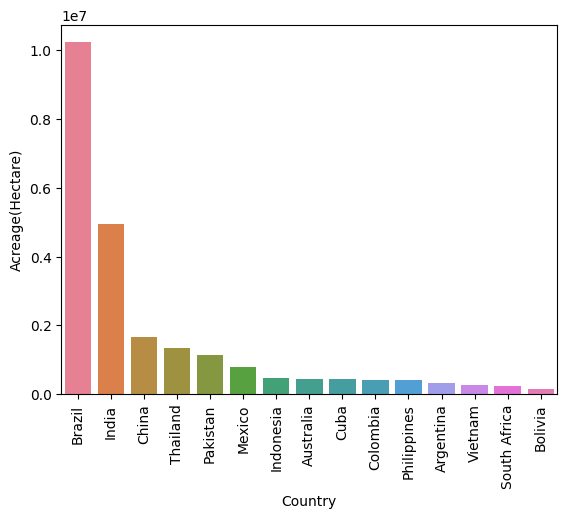

In [38]:
sns.barplot(data = data.sort_values(by='Acreage(Hectare)',ascending = False).head(15), x = 'Country', y = 'Acreage(Hectare)', hue = 'Country')
plt.xticks(rotation=90)  
plt.show()

Conclusion: The country "Brazil" has the largest land for sugarcane planting.

## Which country has highest yield per hectare?

In [39]:
data[['Country','Yield(Kg/Hectare)']].set_index('Country').sort_values(by='Yield(Kg/Hectare)',ascending=False)

,Yield(Kg/Hectare)
Country,
Guatemala,129049.3
Senegal,118085.3
Egypt,115030.6
Peru,112120.2
Malawi,107629.5
...,...
Saint Lucia,80.0
Trinidad and Tobago,54.0
Singapore,25.0


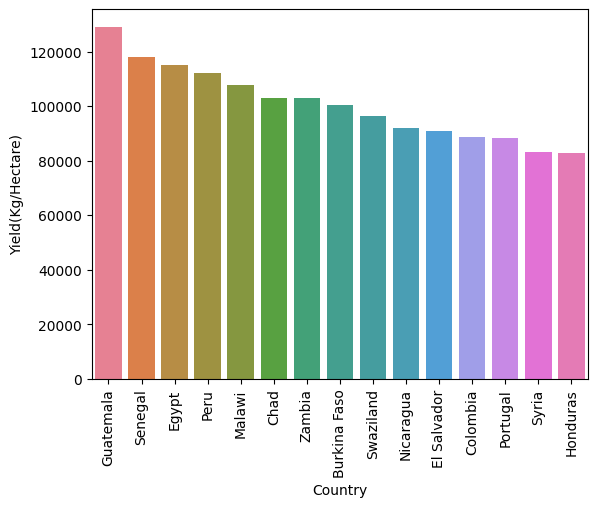

In [40]:
sns.barplot(data = data.sort_values(by='Yield(Kg/Hectare)',ascending = False).head(15), x = 'Country', y = 'Yield(Kg/Hectare)', hue = 'Country')
plt.xticks(rotation=90)  
plt.show()

Conclusion: Guatemala has highest yield per hectare?

## Which country has highest production per person?

In [41]:
data[['Country','Production_per_Person(Kg)']].set_index('Country').sort_values(by='Production_per_Person(Kg)',ascending=False)

,Production_per_Person(Kg)
Country,
Paraguay,951087.0
Colombia,740075.0
Trinidad and Tobago,597066.0
Panama,581814.0
Jamaica,521254.0
...,...
Lebanon,16.0
Singapore,9.0
Spain,8.0


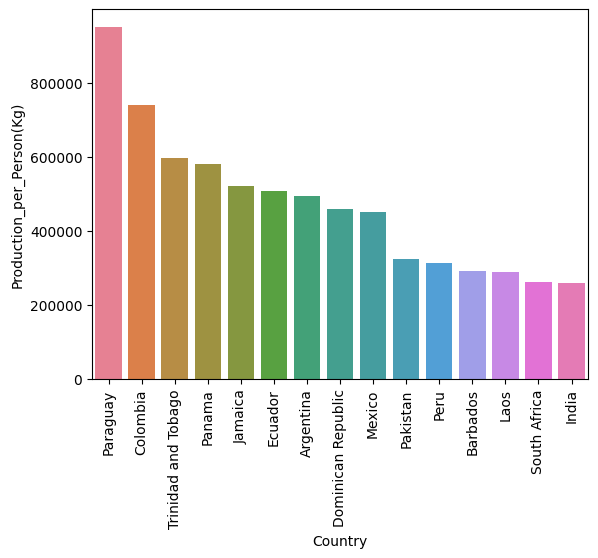

In [42]:
sns.barplot(data = data.sort_values(by='Production_per_Person(Kg)',ascending = False).head(15), x = 'Country', y = 'Production_per_Person(Kg)', hue = 'Country')
plt.xticks(rotation=90)  
plt.show()

Conclusion: Paraguay has highest production per person

## Correlation for countries

In [43]:
data.corr(numeric_only = True)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


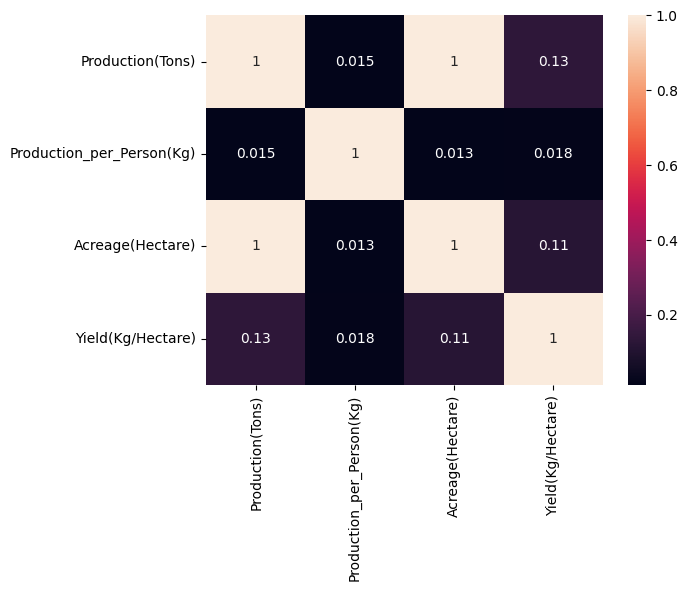

In [44]:
sns.heatmap(data.corr(numeric_only = True), annot = True)
plt.show()

## Do countries with large areas of land for plantation for sugarcane, tend to produce more sugarcane?

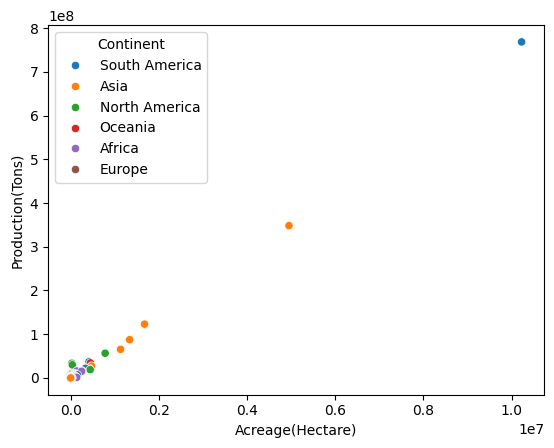

In [45]:
sns.scatterplot(data = data, x = 'Acreage(Hectare)', y='Production(Tons)', hue='Continent')
plt.show()

Conclusion: As the land area dedicated to sugarcane production increases, there is a likelihood that the production will also increase.

## Do countries which yield more sugarcane per hectare produces more  sugarcane in total?

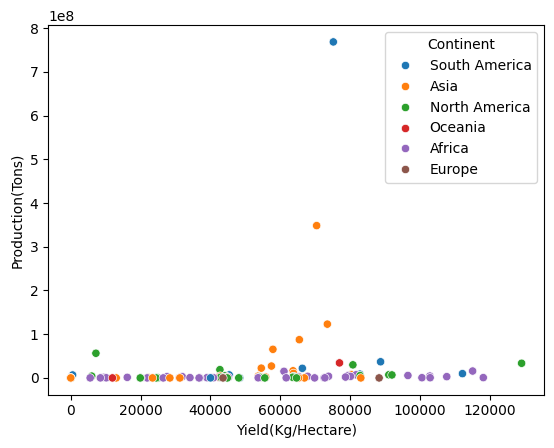

In [46]:
sns.scatterplot(data = data, x = 'Yield(Kg/Hectare)', y='Production(Tons)', hue='Continent')
plt.show()

Conclusion: Yield does not have any affect on the production of sugarcane

# Analysis for Continents

In [47]:
data_continent  = data.groupby('Continent').sum(numeric_only=True)
data_continent

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


In [48]:
data_continent=data.groupby('Continent').sum(numeric_only = True)
data_continent

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


In [49]:
data['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [50]:
data_continent["No_of_countries"]=data['Continent'].value_counts()
data_continent

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),No_of_countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


## Correlation for Continents

In [51]:
data_continent.corr(numeric_only=True)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),No_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_Person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
No_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000


## Which continent produces maximum sugarcane?

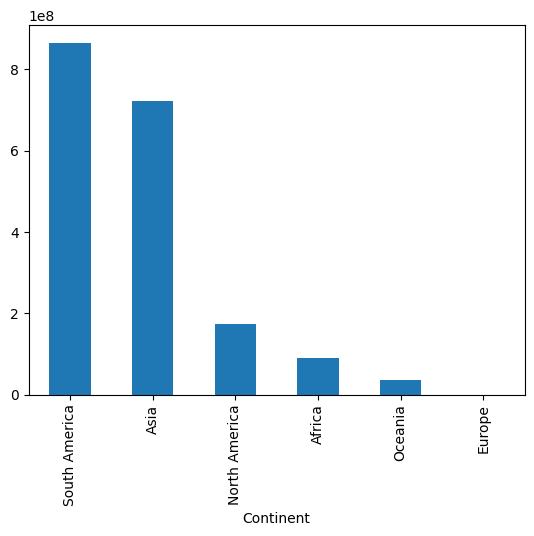

In [52]:
data_continent['Production(Tons)'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

Conclusion: South America produces maximum sugarcane

## Do number of countries in a continent affects the amount of production of sugarcane?

In [53]:
data['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [54]:
data_continent

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),No_of_countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


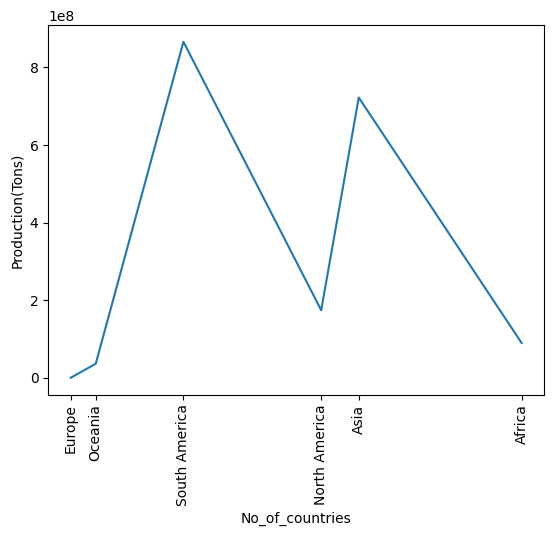

In [55]:
sns.lineplot(data = data_continent, x = 'No_of_countries', y ='Production(Tons)')
plt.xticks(ticks = data_continent['No_of_countries'], labels = data_continent.index, rotation = 90)
plt.show()

Conclusion: No, because even though South America has less countries producing sugarcane, than Africa, still South America produces more sugarcane than Africa, as depicted by the above line plot.

## Do continents with large areas of land for plantation tend to produce more sugarcane?

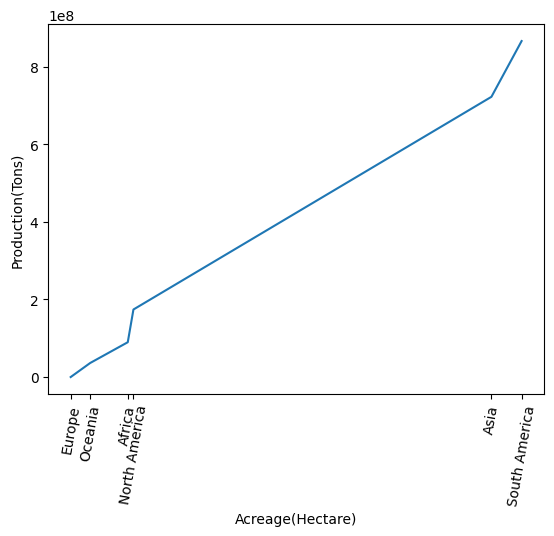

In [56]:
sns.lineplot(data = data_continent, x = 'Acreage(Hectare)', y ='Production(Tons)')
plt.xticks(ticks = data_continent['Acreage(Hectare)'], labels = data_continent.index, rotation = 80)
plt.show()

Conclusion: As the land area dedicated to sugarcane production increases, there is a likelihood that the production will also increase.

## Production distribution by continent

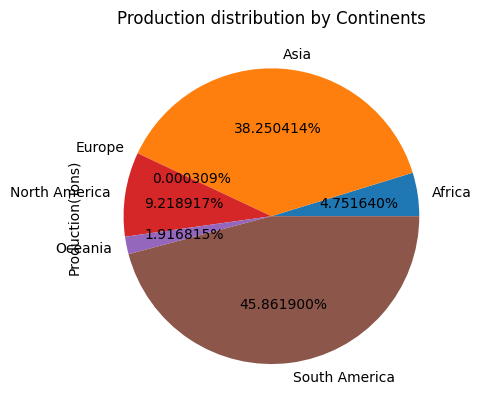

In [72]:
data_continent['Production(Tons)'].plot(kind='pie',autopct = '%1.6f%%')
plt.title('Production distribution by Continents')
plt.show()